In [1]:
import cmocean
import matplotlib.pyplot as plt

from kalpana.export import fort14togdf
from kalpana.plotting import plot_mesh

# Plot the Unstructured Mesh

In [2]:
from pylab import mpl
import matplotlib.pyplot as plt
# Set font properties globally
plt.rcParams['font.family'] = "FreeSerif"
# Set font properties globally
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

<Figure size 3840x2880 with 0 Axes>

<Figure size 3840x2880 with 0 Axes>

In [3]:
## path of the input fort 14 file
filein = r'./fort.14'

## coordinate system of the fort14 input
epsgIn = 4326

## coordinate system of the output shapefile
epsgOut = 4326

## call fort14togdf() to create a geodataframe object
gdf = fort14togdf(filein, epsgIn, epsgOut, fileintype='fort.14')

In [4]:
## display the GeoDataFrame
gdf.head()

,geometry,zmean,centX,centY,v1,v2,v3,id
0,"POLYGON ((-76.70582 43.93997, -76.72254 43.934...",-32.825720,-76.713068,43.933506,1666.0,1668.0,1756.0,0
1,"POLYGON ((-79.20605 43.30627, -79.23287 43.310...",-76.501381,-79.219688,43.303696,5235.0,5288.0,5234.0,1
2,"POLYGON ((-77.67765 43.96889, -77.67208 43.956...",-16.255826,-77.670044,43.964274,3149.0,3241.0,3147.0,2
3,"POLYGON ((-77.95541 43.40283, -77.94134 43.392...",-55.726719,-77.944815,43.399985,3606.0,3514.0,3607.0,3
4,"POLYGON ((-79.69457 43.31783, -79.71313 43.327...",-37.317776,-79.708875,43.319121,5593.0,5594.0,5605.0,4


<Figure size 640x480 with 0 Axes>

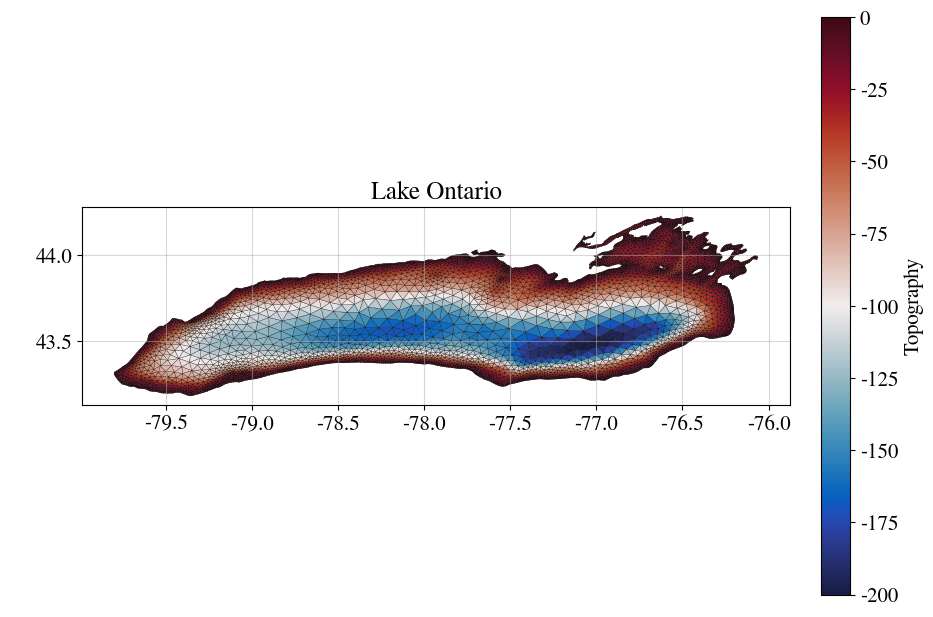

In [5]:
import matplotlib as mpl
import numpy as np
plt.tight_layout()
aspectRatio = 10/7.5
fig, ax = plt.subplots(figsize = (10, 7.5))
plot_mesh(gdf, background = False, cbar = True, lw = 0.2, cmap = cmocean.cm.balance, vmax = 0, vmin = -200,  xlabel = ' ', ylabel = ' ', ax = ax, cbar_label = 'Topography')
# ax.colorbar(im, shrink=0.5)
ax.set_title('Lake Ontario')
ax.grid(alpha = 0.5)
picname = "topo.png"
fig.savefig(picname)

## Plot Contour Maps

In [6]:
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from kalpana.plotting import plot_nc
import cartopy.crs as ccrs
import xarray as xr
mpl.rcParams['text.usetex'] = False

nc_file = r'./fort.63.nc'
nc_file = netcdf.Dataset(nc_file, 'r')

nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: unknown
    git_hash: unknown
    grid_type: Triangular
    description: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: OceanMesh2D
    rundes: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: ADCIRC V56.02                ! 20 CHARACTER ALPANUMERIC RUN IDENTIFICATION
    title: BYY
    institution: MU
    source: OceanMesh2D
    history: History: None
    references: https://mgyby.github.io/boyuanyu.github.io/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2024-12-23 20:12:05 -05:00
    modification_date: 2024-12-23 20:12:05 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 2.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 0
    nolica: 1
    nolicat: 1
    nwp: 0

Text(0.5, 1.0, 'Zeta')

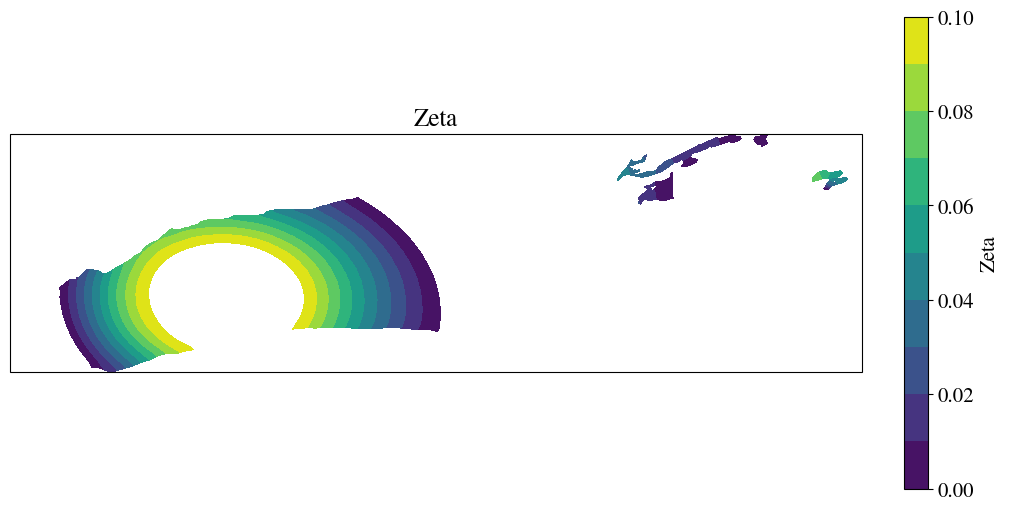

In [7]:
fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection': ccrs.PlateCarree()}, 
                    constrained_layout=True)
plot_nc(nc_file, 'zeta', levels = np.arange(0, 0.11, 0.01), background_map = False, cbar = True, cb_label = 'Zeta',
        ax = ax, fig = fig, ts=20)
# ax.set_title(r'{$\zeta$ (\rm{m})}')
ax.set_title(r'Zeta')

In [8]:
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from kalpana.plotting import plot_nc
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

nc_file = r'./maxele.63.nc'
nc_file = netcdf.Dataset(nc_file, 'r')
nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: unknown
    git_hash: unknown
    grid_type: Triangular
    description: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: OceanMesh2D
    rundes: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: ADCIRC V56.02                ! 20 CHARACTER ALPANUMERIC RUN IDENTIFICATION
    title: BYY
    institution: MU
    source: OceanMesh2D
    history: History: None
    references: https://mgyby.github.io/boyuanyu.github.io/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2024-12-23 20:20:02 -05:00
    modification_date: 2024-12-23 20:20:02 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 2.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 0
    nolica: 1
    nolicat: 1
    nwp: 0

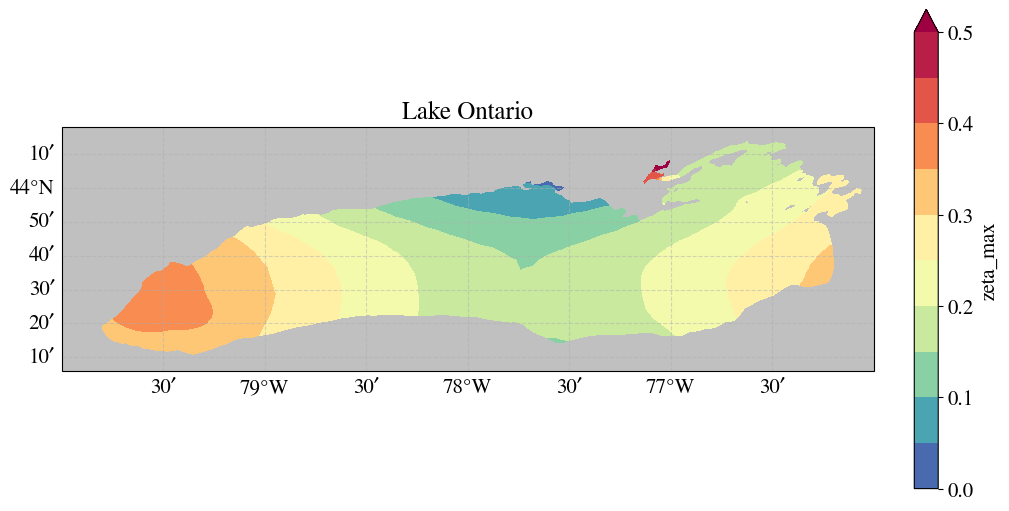

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl
from cartopy.feature import ShapelyFeature
import shapely.vectorized

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection': ccrs.PlateCarree()}, 
                    constrained_layout=True)

ax.set_extent([-76,-80,43.1,44.30],crs=ccrs.PlateCarree())
# ax.set_xticks(np.arange(-80,-76+1,1.0))
# ax.set_yticks(np.arange(43,44.5+0.5,0.5))
# # not showing NSEW
# cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
# lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
# lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

plot_nc(nc_file, 'zeta_max', levels = np.arange(0, 0.55, 0.05), background_map = True, cbar = True, cb_label = 'zeta_max',
        ax = ax, fig = fig, cmap='Spectral_r', extend='max')

# shp_file = r'./GSHHS_l_L1.shp'
# shape_feature = ShapelyFeature(Reader(shp_file).geometries(), proj, facecolor='none')
# ax.add_feature(shape_feature)

# ax.add_feature(cfeat.LAND.with_scale('50m'), zorder=1)

# ax.set_title(r'{$\zeta$ (\rm{m})}')
# ax.set_title(r'Zeta')
ax.set_title('Lake Ontario')
ax.grid(alpha = 0.5)